In [3]:
import pandas as pd, numpy as np
df=pd.read_csv("wrangled_transactions.csv",index_col="CustomerID")
df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [4]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.108837,-0.234629,0.467450,0.815594,0.598361
days_since_first_purchase,0.108837,1.000000,0.635764,0.297175,-0.048815,0.076373
days_since_last_purchase,-0.234629,0.635764,1.000000,-0.373529,-0.061152,-0.165461
number_of_purchases,0.467450,0.297175,-0.373529,1.000000,0.009512,0.383715
avg_order_cost,0.815594,-0.048815,-0.061152,0.009512,1.000000,0.434781
revenue_2020,0.598361,0.076373,-0.165461,0.383715,0.434781,1.000000


In [7]:
X=df[['revenue_2019','days_since_last_purchase','number_of_purchases','avg_order_cost']]
y=df['revenue_2020']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([  5.21596829,   6.34049776, 358.24570724,  -2.3330984 ])

In [12]:
X.columns

Index(['revenue_2019', 'days_since_last_purchase', 'number_of_purchases',
       'avg_order_cost'],
      dtype='object')

In [13]:
model.intercept_

487.6925753095247

revenue_2020=487.69 + (5.21596829*revenue_2019) + (6.34* days_since_last_purchase) + 
                (358.246* number_of_purchases) + (-2.33* avg_order_cost)

In [14]:
prediction=model.predict(X_test)

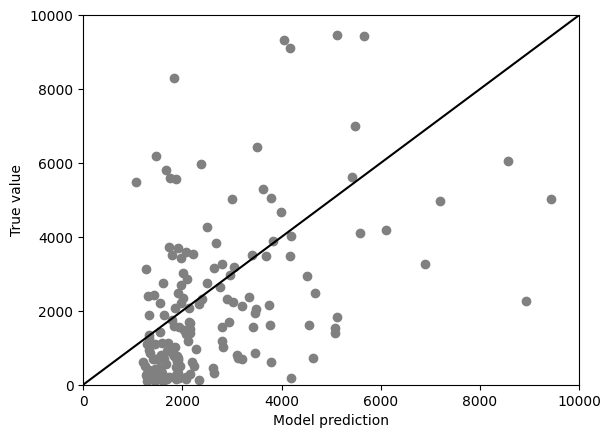

In [17]:
import matplotlib.pyplot as plt
plt.scatter(prediction, y_test,color='gray')
plt.xlabel('Model prediction')
plt.ylabel("True value")
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0,10000],[0,10000],'k-')
plt.show()

In [18]:
np.corrcoef(prediction, y_test)

array([[1.        , 0.50042156],
       [0.50042156, 1.        ]])

# Predicting store revenue using Linear Regression

In [33]:
df=pd.read_csv("location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [34]:
X=df[['num_competitors','median_income','num_loyalty_members','population_density','location_age']]
y=df['revenue']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=100)
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [37]:
X.columns

Index(['num_competitors', 'median_income', 'num_loyalty_members',
       'population_density', 'location_age'],
      dtype='object')

In [38]:
model.intercept_

-51068.63644236376

In [39]:
X_train.head()

,num_competitors,median_income,num_loyalty_members,population_density,location_age
786,4.0,33390.73,1961.0,4413.0,16.0
152,3.0,29936.93,1629.0,2386.0,14.0
925,3.0,29096.46,1449.0,3355.0,10.0
501,3.0,32414.87,1578.0,3517.0,10.0
920,3.0,29262.14,1657.0,2964.0,11.0


In [43]:
single_pred=pd.DataFrame({'num_competitors':[3],'median_income':[30000],'num_loyalty_members':[1200],'population_density':[2000],'location_age':[10]})
single_pred

,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,3,30000,1200,2000,10


In [44]:
model.predict(single_pred)

array([27573.21782447])

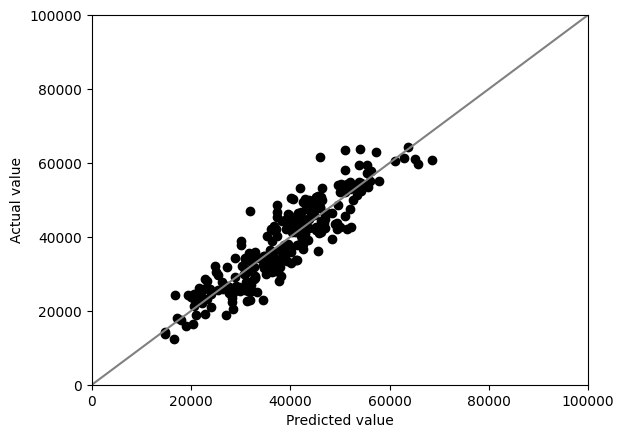

In [53]:
prediction=model.predict(X_test)
plt.scatter(prediction,y_test,color='black')
plt.xlim([0,100000])
plt.ylim([0,100000])
plt.plot([0,100000],[0,100000],'k-',color='gray')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [54]:
np.corrcoef(prediction, y_test)

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])

correlation between the model predictions and the true values of the test data is 0.91